<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
from tqdm import tqdm
import numpy as np

import modin.pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [31]:
df = pd.read_csv(path, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


Add the headers to the dataframe, as mentioned in the project scenario. 


In [32]:
cols = ['age','gender','bmi','no_of_child','smoker','region','charges']

df.columns = cols
df

,age,gender,bmi,no_of_child,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


Now, replace the '?' entries with 'NaN' values.


In [33]:
df.replace('?',np.NaN, inplace=True)

# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [34]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2768 non-null   object 
 1   gender       2772 non-null   int64  
 2   bmi          2772 non-null   float64
 3   no_of_child  2772 non-null   int64  
 4   smoker       2765 non-null   object 
 5   region       2772 non-null   int64  
 6   charges      2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [40]:
for k,v in dict(df.dtypes).items():
    if v == 'O':
        df[k].replace(np.NaN, df[k].value_counts()[0], inplace=True)
    elif v == 'int64' or v =='float64':
        df[k].replace(np.NaN, df[k].mean(), inplace=True)

df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          2772 non-null   object 
 1   gender       2772 non-null   int64  
 2   bmi          2772 non-null   float64
 3   no_of_child  2772 non-null   int64  
 4   smoker       2772 non-null   object 
 5   region       2772 non-null   int64  
 6   charges      2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [41]:
df['charges'] = df['charges'].round(2)
df['charges'].head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


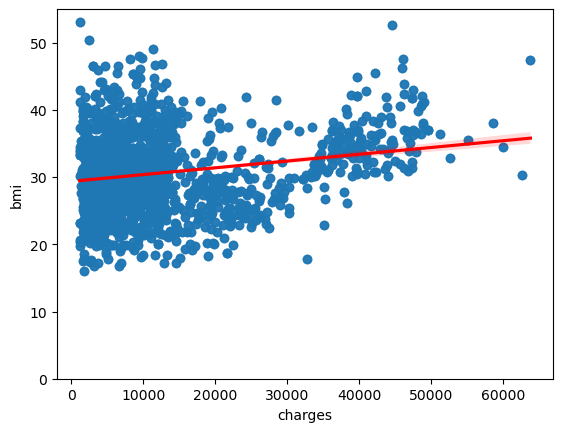

In [44]:
sns.regplot(df, x='charges',y='bmi', line_kws={"color":"red"})
plt.ylim(0,)
plt.show()

Implement the box plot for `charges` with respect to `smoker`.


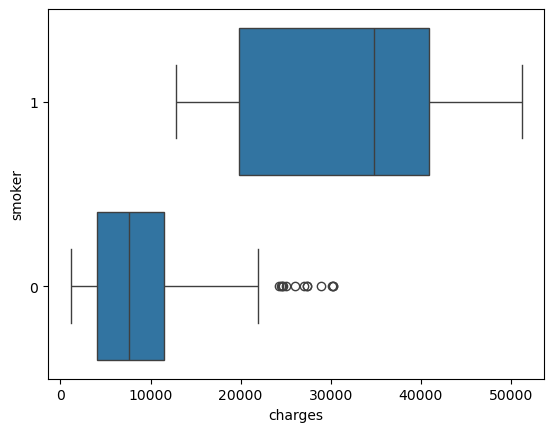

In [47]:
sns.boxplot(df, x='charges', y='smoker')
plt.show()

Print the correlation matrix for the dataset.


In [ ]:
df.astype(float).corr()

,age,gender,bmi,no_of_child,smoker,region,charges
age,1.000000,-0.021932,0.108791,0.043882,-0.012871,-0.012357,0.291468
gender,-0.021932,1.000000,0.042924,0.016020,-0.007564,0.022213,0.062837
bmi,0.108791,0.042924,1.000000,-0.001492,-0.038513,0.271119,0.199846
no_of_child,0.043882,0.016020,-0.001492,1.000000,-0.004188,-0.025717,0.066442
smoker,-0.012871,-0.007564,-0.038513,-0.004188,1.000000,-0.011973,-0.013094
region,-0.012357,0.022213,0.271119,-0.025717,-0.011973,1.000000,0.054058
charges,0.291468,0.062837,0.199846,0.066442,-0.013094,0.054058,1.000000


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [54]:
lm = LinearRegression()
lm.fit(df[['smoker']], df['charges'])
lm.score(df[['smoker']],df['charges'])

0.00017146371348997214

Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [55]:
lm = LinearRegression()
lm.fit(df[[col for col in df.columns if col != 'charges']], df['charges'])
lm.score(df[[col for col in df.columns if col != 'charges']],df['charges'])

0.12040295715104743

Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

input = [('scale', StandardScaler()),('pr',PolynomialFeatures()),('lm',LinearRegression())]
pipe = Pipeline(input)

pipe.fit(df[[col for col in df.columns if col != 'charges']], df['charges'])
pipe.score(df[[col for col in df.columns if col != 'charges']],df['charges'])

0.7502451988721792

# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [59]:
# Write your code below and press Shift+Enter to execute 
x_train, x_test, y_train, y_test = train_test_split(df[[col for col in df.columns if col != 'charges']], df['charges'], test_size=0.2, random_state = 0)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [63]:
from sklearn.metrics import r2_score

In [64]:
rm = Ridge(alpha=0.1)
rm.fit(x_train,y_train)
yhat = rm.predict(x_test)
print(r2_score(y_test,yhat))

0.13744980057183942


In [ ]:
r2_score()

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [ ]:
pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

rm.fit(x_train_pr,y_train)
yhat = rm.predict(x_test_pr)
print(r2_score(y_test,yhat))

-6.618615347747513


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
